In [116]:
import numpy as np
from collections import Counter
from scipy import stats
from scipy.stats import t
import pandas as pd
import statsmodels as sm
from statsmodels.stats import power as pwr

import re
import os
import sys
from collections import defaultdict, Counter
import math
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

<ipython-input-116-44d26842566d>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Вопрос 1
Дискретная случайная величина Х задана законом распределения:

`x = [-1, 0, 1, 2, 3]`

`p1 = [None, 0.1, 0.3, 0.2, 0.3]`

Найти p1, функцию распределения F(x) и построить ее график, а также M(X), D(X), σ(Х).

Ответы:

    p1 =  0.1
    F_x = 0.1 0.2 0.4 0.7 1.0
    M(X) =  1.5
    D(X) = 1.65
    σ(Х) = 1.28


p1 =  0.1
F_x:  0.1 0.2 0.4 0.7 1.0
M(X):  1.5
D(X):  1.65
σ(Х):  1.28


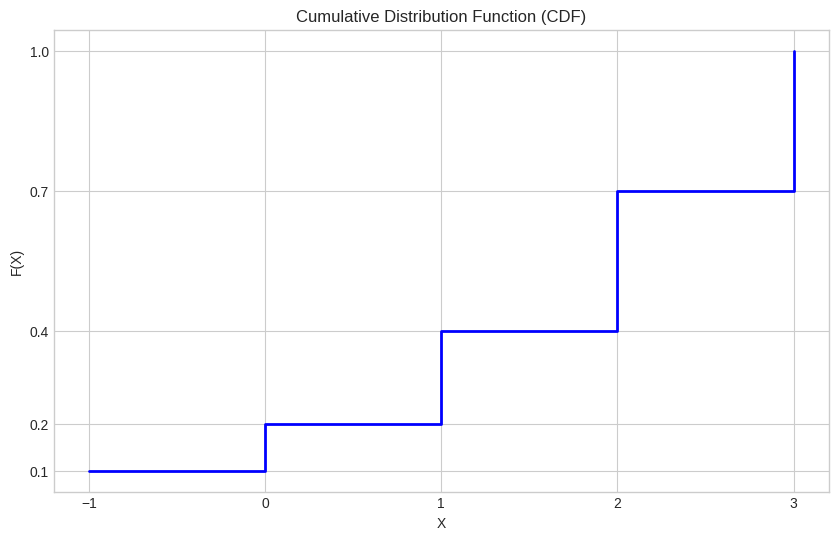

In [117]:
x = [-1, 0, 1, 2, 3]
p1 = None
p = [p1, 0.1, 0.3, 0.2, 0.3]
p1 = round(1 - sum(p[1:]), 1)
p[0] = p1

print('p1 = ', p1)

F_x = np.cumsum(sorted(p))
print('F_x: ', ' '.join(map(str, F_x)))

M_x = np.sum([x * p for x, p in zip(x, p)])
print('M(X): ', M_x)

D_x = sum([(x - M_x)**2 * p for x, p in zip(x, p)])
print('D(X): ', D_x)

sigma_x = np.sqrt(D_x)
print('σ(Х): ', round(sigma_x, 2))

plt.figure(figsize=(10, 6))
plt.step(x, F_x, where='post', color='blue', linewidth=2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("X")
plt.ylabel("F(X)")
# plt.grid(False)
plt.xticks(x)
plt.yticks([round(i, 2) for i in F_x])
plt.show()


### Вопрос 2

Среди 10 изготовленных микросхем 3 дефектные. Для числа дефектных среди наудачу взятых четырех микросхем составить закон распределения. Найти математическое ожидание и дисперсию.

Ответ:

    E(X) = 1.2
    D(X) = 0.56

In [118]:
# Для данной задачи наиболее подходящим является гипергеометрическое распределение.
# Оно описывает вероятность того, что в выборке из n различных объектов,
# вытянутых из поставки, ровно k объектов являются бракованными.
N = 10  # всего микросхем
D = 3  # дефектных микросхем
k = 4  # выбранные наудачу

M_x = k * D / N
D_x = k * (D / N) * ((N - D) / N) * (N - k) / (N - 1)

print('M(X): ', M_x)
print('D(X): ', D_x)

# Математическое ожидание E(X) равно 1.2, что означает, что в среднем среди 4 наудачу
# выбранных микросхем 1.2 из них будут дефектными.


M(X):  1.2
D(X):  0.56


### Вопрос 3

Производится последовательное бросание двух игральных костей. При выпадении на одной игральной кости одного, трех или пяти очков игрок лишается 5 рублей. При выпадении двух или четырех очков игрок получает 4 рубля. При выпадении шести очков игрок лишается 9 рублей. Случайная величина есть выигрыш игрока при двух бросаниях костей. Найти закон распределения , построить график функции распределения, найти математическое ожидание и дисперсию.
Ответ округлить до двух знаков после запятой.

    M_x = -5.33
    D_x = 48.44


M_x:  -5.33
D_x:  48.44
[-18, -14, -10, -5, -1, 8]


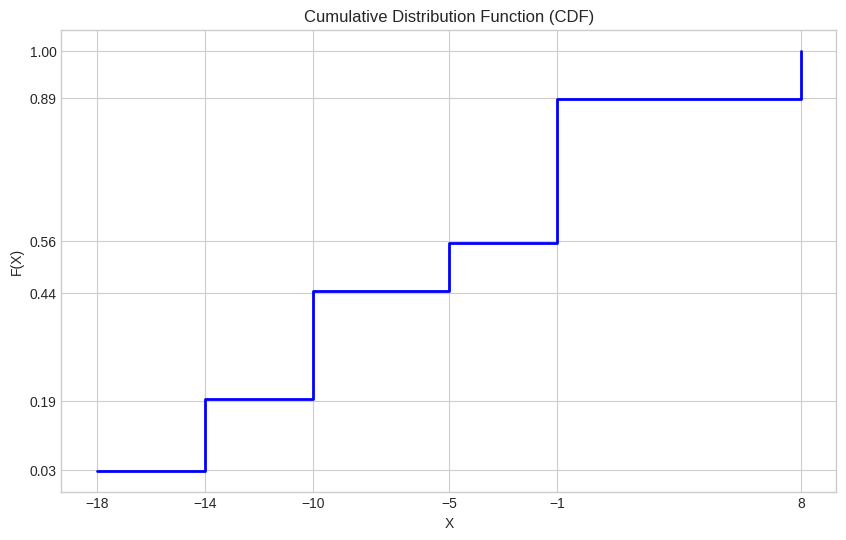

In [119]:
outcomes = [-5, 4, -9]
probabilities = [1/2, 1/3, 1/6]

distribution = defaultdict(float)

for outcome1, prob1 in zip(outcomes, probabilities):
    for outcome2, prob2 in zip(outcomes, probabilities):
        distribution[outcome1 + outcome2] += prob1 * prob2

M_x = sum([outcome * probability for outcome, probability in distribution.items()])
D_x = sum([(outcome - M_x)**2 * probability for outcome, probability in distribution.items()])

print('M_x: ', round(M_x, 2))
print('D_x: ', round(D_x, 2))

sorted_outcomes = sorted(distribution.keys())
cumulative_probs = [sum(distribution[outcome] for outcome in sorted_outcomes if outcome <= x) \
                    for x in sorted_outcomes]

print(sorted_outcomes)

plt.figure(figsize=(10, 6))
plt.step(sorted_outcomes, cumulative_probs, where='post', color='blue', linewidth=2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("X")
plt.ylabel("F(X)")
plt.grid(True)
plt.xticks(sorted_outcomes)
plt.yticks([round(i, 2) for i in cumulative_probs])
plt.show()

## Задание практика:
### Подсчет велосипедов


In [237]:
# datum — это дата в формате дд/мм/гг .
# tijd — это время суток в формате чч:мм.
# ri Centrum и ri Mariakerke — это счетчики на тот момент времени (счетчики между этой отметкой времени и предыдущей).
df_raw = pd.read_csv('https://docs.google.com/spreadsheets/d/1SzZeq3QHyPhQXv_wyCf9QcfbhrGDnzQ4SasgLoy4U_Q/export?format=csv')
df_raw.head()


,datum,tijd,ri Centrum,ri Mariakerke
0,7/14/2011,17:44,21,46
1,7/14/2011,17:59,17,60
2,7/14/2011,18:14,13,48
3,7/14/2011,18:29,22,48
4,7/14/2011,18:44,15,51


In [238]:
def process_bike_count_data(df):
    df['datum_tijd'] = df.datum + ' ' + df.tijd
    df['datum_tijd'] = pd.to_datetime(df['datum_tijd'], dayfirst=True)
    df = df.drop(['datum', 'tijd'], axis=1)
    df = df.rename(columns={'ri Centrum': 'direction_centre', 'ri Mariakerke': 'direction_mariakerke'})
    return df

In [239]:
df_preprocessed = process_bike_count_data(df_raw)
df_preprocessed

,direction_centre,direction_mariakerke,datum_tijd
0,21,46,2011-07-14 17:44:00
1,17,60,2011-07-14 17:59:00
2,13,48,2011-07-14 18:14:00
3,22,48,2011-07-14 18:29:00
4,15,51,2011-07-14 18:44:00
...,...,...,...
65530,20,26,2013-06-17 10:52:00
65531,36,26,2013-06-17 11:07:00
65532,29,25,2013-06-17 11:22:00
65533,20,34,2013-06-17 11:37:00


In [240]:
df_preprocessed.to_csv("bike_count_interim.csv", index=False)

## 3. Исследование и анализ данных

In [241]:
df = pd.read_csv("bike_count_interim.csv", parse_dates=[2])
df.head()

,direction_centre,direction_mariakerke,datum_tijd
0,21,46,2011-07-14 17:44:00
1,17,60,2011-07-14 17:59:00
2,13,48,2011-07-14 18:14:00
3,22,48,2011-07-14 18:29:00
4,15,51,2011-07-14 18:44:00


In [242]:
# Проверка интервала подсчета
df.set_index('datum_tijd', inplace=True)
pd.Series(df.index).diff()

0                   NaT
1       0 days 00:15:00
2       0 days 00:15:00
3       0 days 00:15:00
4       0 days 00:15:00
              ...      
65530   0 days 00:15:00
65531   0 days 00:15:00
65532   0 days 00:15:00
65533   0 days 00:15:00
65534   0 days 00:15:00
Name: datum_tijd, Length: 65535, dtype: timedelta64[ns]

In [245]:
pd.Series(df.index).diff().value_counts().head(10)

0 days 00:15:00        65222
30 days 00:15:00         132
29 days 00:15:00          88
28 days 00:15:00          12
27 days 00:15:00          10
0 days 00:11:00            4
-236 days +00:15:00        3
-88 days +00:15:00         3
-177 days +00:15:00        2
-207 days +00:15:00        2
Name: datum_tijd, dtype: int64

In [246]:
df.describe()

,direction_centre,direction_mariakerke
count,65535.000000,65535.000000
mean,22.606836,22.515602
std,29.124648,24.708912
min,0.000000,0.000000
25%,4.000000,6.000000
50%,15.000000,15.000000
75%,30.000000,30.000000
max,319.000000,299.000000


In [248]:
df_both = pd.DataFrame(df['direction_centre'] + df['direction_mariakerke'])
df_both.columns = ['both']
df_both.head()

,both
datum_tijd,
2011-07-14 17:44:00,67
2011-07-14 17:59:00,77
2011-07-14 18:14:00,61
2011-07-14 18:29:00,70
2011-07-14 18:44:00,66


In [249]:
df_quiet = df_both.query('both < 5')
df_quiet.head()

,both
datum_tijd,
2011-07-15 00:59:00,4
2011-07-15 01:44:00,3
2011-07-15 02:29:00,0
2011-07-15 02:44:00,1
2011-07-15 02:59:00,1


In [250]:
# интервалы, за которые в том или ином направлении проехало менее 3 велосипедистов
df.query('direction_centre < 3 or direction_mariakerke < 3')

,direction_centre,direction_mariakerke
datum_tijd,,
2011-07-14 23:59:00,1,13
2011-07-15 00:14:00,2,3
2011-07-15 00:44:00,2,6
2011-07-15 00:59:00,0,4
2011-07-15 01:29:00,1,10
...,...,...
2013-06-17 06:07:00,4,0
2013-06-17 06:22:00,8,1
2013-06-17 06:37:00,5,2


#### Считать статистику

In [224]:
# Какое среднее количество велосипедистов проезжает каждые 15 минут?
# df_both.mean().round(2).iloc[0]
df_both.resample('15MIN').sum().mean().round(2).iloc[0]

28.98

In [219]:
# Какое среднее количество велосипедистов проезжает каждый час?
df_both.resample('H').sum().mean().round(2).iloc[0]

115.91

In [205]:
# Каковы 10 самых высоких пиковых значений, наблюдаемых в течение любого
# из интервалов для направления к центру Гента?
df.direction_centre.sort_values(ascending=False).head(10)

datum_tijd
2011-04-10 08:27:00    319
2012-02-10 08:42:00    309
2011-09-27 08:27:00    309
2013-05-06 03:37:00    303
2011-03-10 08:27:00    297
2012-01-10 08:42:00    296
2011-05-10 08:27:00    288
2012-10-10 08:42:00    288
2011-09-28 08:27:00    287
2011-11-10 08:27:00    285
Name: direction_centre, dtype: int64

In [226]:
# Какое максимальное количество велосипедистов проехало за один день в обоих направлениях вместе взятых?
df_both.resample('D').sum().max().round(2).iloc[0]

10213

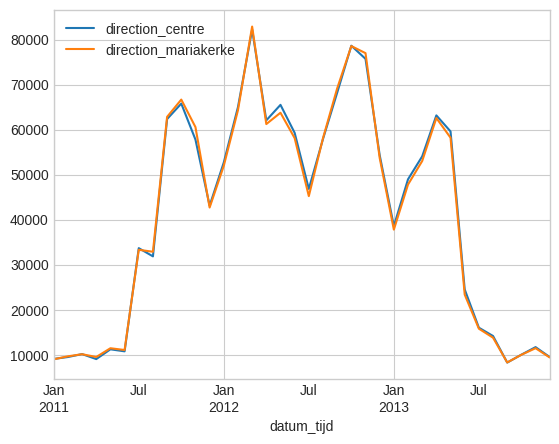

In [228]:
# Как выглядит долгосрочный тренд? Рассчитайте ежемесячные суммы и постройте график результата.
monthly_sum = df.resample('M').sum()
monthly_sum.plot();

In [ ]:
# Давайте посмотрим на некоторые краткосрочные модели. Для данных за первые 3 недели
# января 2014 г. рассчитайте почасовые подсчеты и визуализируйте их.
subset_january = df.loc['2014-01-01':'2014-01-21'].resample('H').sum()
subset_january.loc['2014-01-01':].plot()

# Последняя дата в полученных данных - 2013-06-17 11:52:00 !!!

In [236]:
# Подмножество набора данных с 2013-12-31 12:00:00 до 2014-01-01 12:00:00
newyear = df['2013-12-31 12:00:00':'2014-01-01 12:00:00']
newyear

# # Последняя дата в полученных данных - 2013-06-17 11:52:00 !!!

<ipython-input-236-142d10864ef0>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  newyear = df['2013-12-31 12:00:00':'2014-01-01 12:00:00']


,direction_centre,direction_mariakerke
datum_tijd,,


<Axes: xlabel='datum_tijd'>

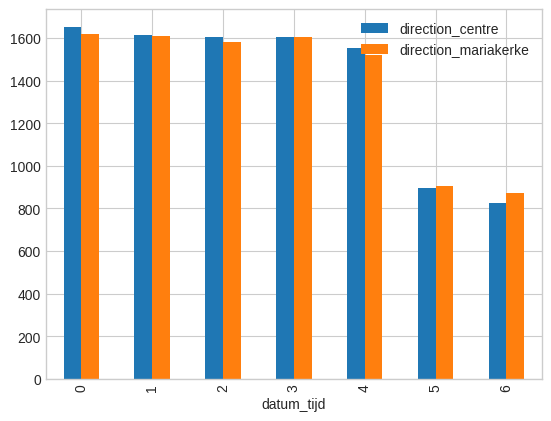

In [254]:
# Ежедневный шаблон
df_daily = df.resample('D').sum()
df_daily.groupby(df_daily.index.dayofweek).mean().plot(kind='bar')

<Axes: xlabel='datum_tijd'>

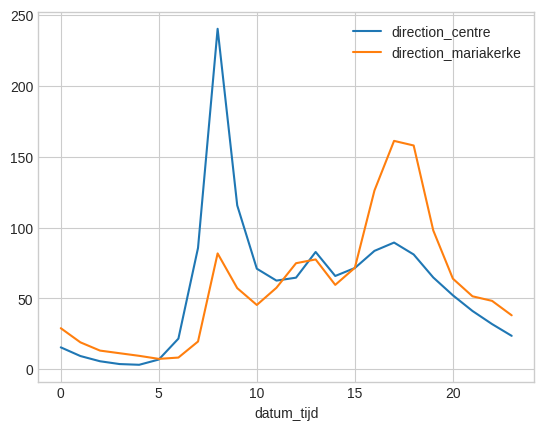

In [255]:
# Внутрисуточный шаблон
df_hourly = df.resample('H').sum()
df_hourly.groupby(df_hourly.index.hour).mean().plot()

<ipython-input-256-296a4f42abd7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  xlabels = ax.set_xticklabels(list(month_abbr)[0::2])


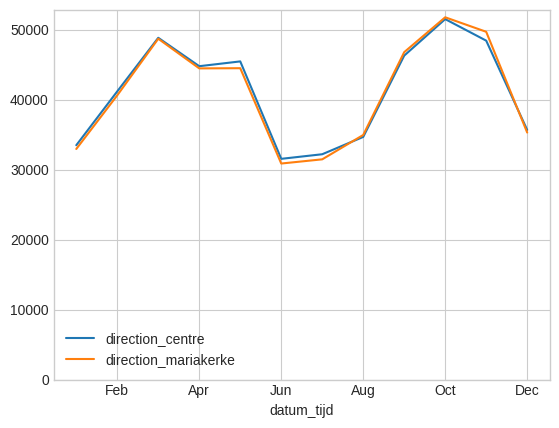

In [256]:
# Месячный шаблон
from calendar import month_abbr

df_monthly = df.resample('M').sum()
ax = df_monthly.groupby(df_monthly.index.month).mean().plot()
ax.set_ylim(0)
xlabels = ax.set_xticklabels(list(month_abbr)[0::2])